# Definitions
- Definir estações
- Artigo para ler: https://latamt.ieeer9.org/index.php/transactions/article/view/5563
- Plotar hora a hora, e o describe
- Transformação logaritmica, para variacia não constante?
- Método Box-Cox ou deflacionar a série
- Modelar a serie temporal
  - Normality hypothesis tests, Anderson-Darling and Shapiro-Wilk
  - Decompor em 3 partes: tendência, sazonalidade e resíduo
- Aplicar estacionariedade
- Verificar precipitação, quando tiver.
- A press atmo do nivel da estacao ja é a media
- Usar temp. Bulbo seco
- Agrupar por estacoes do ano (verao, inverno, etc)
- Corte as 5h as 21h
- Verificar umidade no litoral
- Pegar estacoes proximas, ir do litoral ao interior
- Pegar principalmente duas regioes (bahia e sul, por exemplo)
- Transfer learning entre estacoes nas regioes


### Escolhendo estações
Iremos escolher duas regiões:
- Bahia, pegando algumas estações (umas 3) e indo do litoral até o interior.
- RS, com o mesmo comportamento da primeira.

Bahia:
- A401
- A413
- A440

RS:
- A801
- A840
- A893

Nesse Notebook, analisaremos os dados da estação A893 (Encruzilhada do Sul, Rio Grande do Sul), que fica nem uma região mais central do estado.


### Imports

In [5]:
%run Utils.ipynb

In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
%matplotlib inline
from matplotlib import pyplot as plt

In [7]:
dict_files = get_files(n=None)

In [8]:
# dict_files.keys()
print(dict_files["A893"][0])

REGIAO:;S
UF:;RS
ESTACAO:;ENCRUZILHADA DO SUL
CODIGO (WMO):;A893
LATITUDE:;-30,54305555
LONGITUDE:;-52,52472221
ALTITUDE:;427,75
DATA DE FUNDACAO:;15/03/18



In [9]:
dict_files["A893"][1]

'data/estacoes_solares/2023/INMET_S_RS_A893_ENCRUZILHADA DO SUL_01-01-2023_A_31-12-2023.CSV'

### Pre processamento

In [10]:
df = load(dict_files["A893"][1])
df = renameDatasetColumns(df)
df = transform_datetime(df)
df = create_datetime_feature(df)
df = create_split_date_features(df)
df = removeNulls(df, "radiacao")
df = change_types(df)

In [11]:
df.head().T

,9,10,11,12,13
precipitação_total_horário_mm,0.0,0.0,0.0,0.0,0.0
pressao_atmosferica_ao_nivel_da_estacao_horaria_mb,965.1,965.5,965.6,965.4,965.2
pressão_atmosferica_max_na_hora_ant_aut_mb,965.1,965.5,965.7,965.6,965.5
pressão_atmosferica_min_na_hora_ant_aut_mb,964.8,965.0,965.5,965.3,965.2
radiacao,20.0,170.7,1306.1,2156.5,2872.9
temperatura_do_ar_bulbo_seco_horaria_c,23.1,25.4,26.9,28.1,29.9
temperatura_do_ponto_de_orvalho_c,11.0,12.7,15.2,16.3,17.2
temperatura_máxima_na_hora_ant_aut_c,23.1,25.4,26.9,28.1,30.0
temperatura_mínima_na_hora_ant_aut_c,22.6,23.1,25.4,26.6,28.0
temperatura_orvalho_max_na_hora_ant_aut_c,11.0,12.7,15.2,16.6,17.4


### Algumas estatisticas

In [12]:
numerics = ['float16', 'float32', 'float64']

df.select_dtypes(include=numerics).describe().T

,count,mean,std,min,25%,50%,75%,max
precipitação_total_horário_mm,4843.0,0.316044,1.818355,0.0,0.0,0.0,0.00,55.0
pressao_atmosferica_ao_nivel_da_estacao_horaria_mb,4843.0,966.479496,4.854812,948.8,963.2,966.6,969.85,982.8
pressão_atmosferica_max_na_hora_ant_aut_mb,4843.0,966.793207,4.793972,949.3,963.5,966.9,970.10,982.9
pressão_atmosferica_min_na_hora_ant_aut_mb,4843.0,966.179537,4.910948,948.6,962.8,966.3,969.60,982.7
radiacao,4843.0,1199.101982,1098.856328,0.0,176.4,918.0,2038.60,4126.8
temperatura_do_ar_bulbo_seco_horaria_c,4843.0,20.169317,5.850470,1.2,16.1,20.1,24.10,36.7
temperatura_do_ponto_de_orvalho_c,4843.0,14.498740,4.986635,-6.2,11.8,15.3,18.40,25.0
temperatura_máxima_na_hora_ant_aut_c,4843.0,20.790233,6.049990,1.2,16.6,20.7,24.90,37.5
temperatura_mínima_na_hora_ant_aut_c,4843.0,19.366323,5.756854,1.0,15.5,19.3,23.10,35.2
temperatura_orvalho_max_na_hora_ant_aut_c,4843.0,15.141854,4.889898,-4.1,12.4,15.9,18.90,25.4


### Plot por mes

<Axes: xlabel='mes', ylabel='mean'>

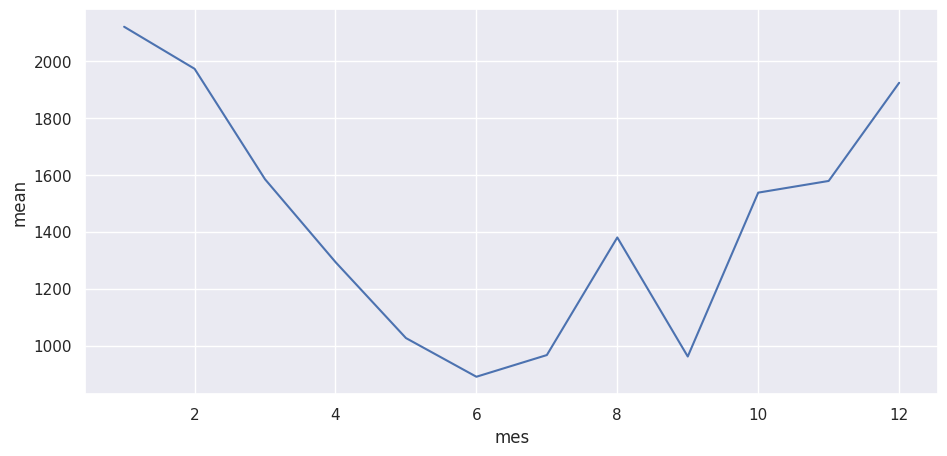

In [13]:
set_plot_size(11, 5)
df_month = filter_between(df, "hora", 10, 20)

df_month = df_month[["mes", "radiacao"]].groupby(['mes'])\
['radiacao'].agg(['mean','std']).reset_index()

sns.lineplot(data=df_month, x=df_month["mes"], y=df_month["mean"])

### Por hora

<Axes: xlabel='hora', ylabel='radiacao'>

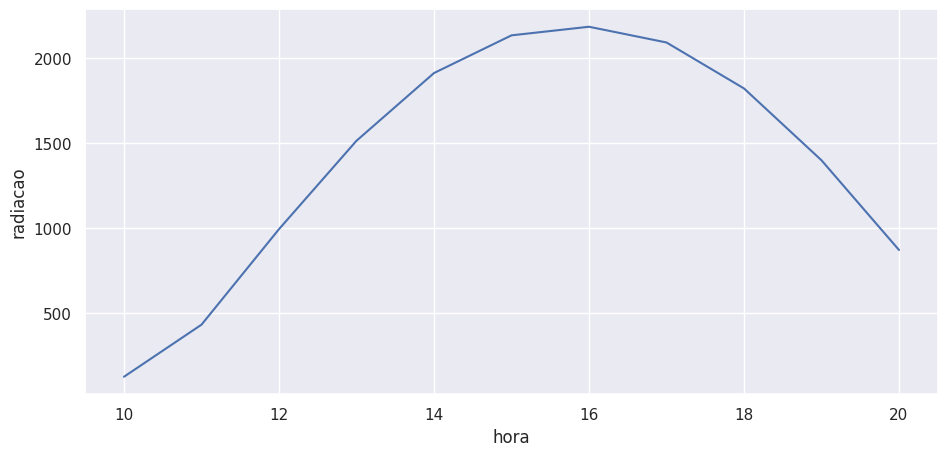

In [14]:
df_hour = filter_between(df, "hora", 10, 20)

df_hour = df_hour[["hora", "radiacao"]].groupby(['hora']).mean().reset_index()

sns.lineplot(data=df_hour, x=df_hour["hora"], y=df_hour["radiacao"])

#### Hora com o vento como `hue`

[ 0.   5.   6.4  8.2 20.2]


<Axes: xlabel='hora', ylabel='radiacao'>

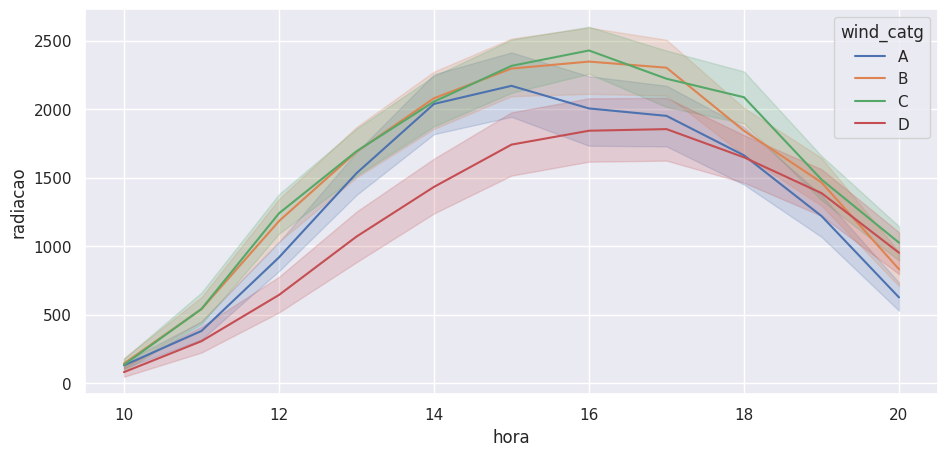

In [15]:
df_hour_wind = filter_between(df, "hora", 10, 20)
df_hour_wind = df_hour_wind[[
    "hora", 
    "radiacao", 
    "vento_rajada_maxima_ms"]]\
.fillna(0)

df_hour_wind["wind_catg"] = create_category("vento_rajada_maxima_ms", df_hour_wind)
sns.lineplot(data=df_hour_wind, x=df_hour_wind["hora"], y=df_hour_wind["radiacao"], hue=df_hour_wind["wind_catg"])

#### Hora com a pressão atmo. como `hue`

[949.2 963.6 967.  970.3 982.8]


<Axes: xlabel='hora', ylabel='radiacao'>

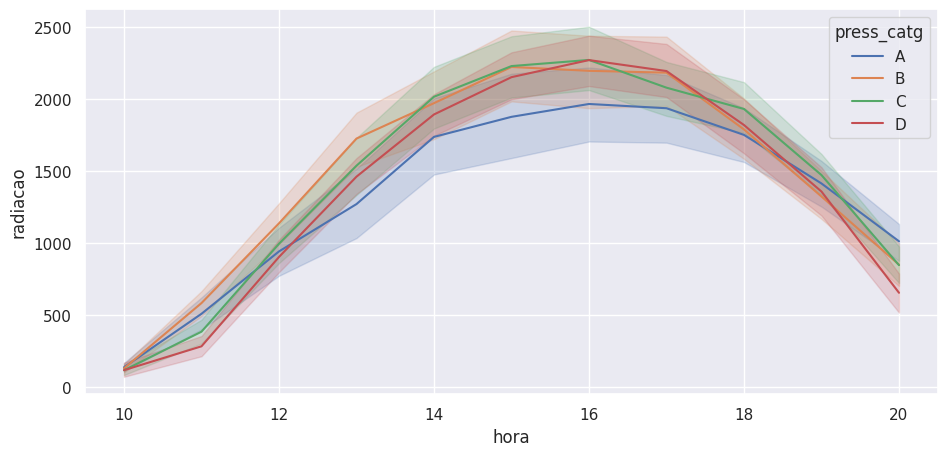

In [16]:
df_hour_press = filter_between(df, "hora", 10, 20)
df_hour_press = df_hour_press[[
    "hora", 
    "radiacao", 
    "pressao_atmosferica_ao_nivel_da_estacao_horaria_mb"]]\
.fillna(0)

df_hour_press["press_catg"] = create_category("pressao_atmosferica_ao_nivel_da_estacao_horaria_mb", df_hour_press)
sns.lineplot(data=df_hour_press, x=df_hour_press["hora"], y=df_hour_press["radiacao"], hue=df_hour_press["press_catg"])

#### Hora com a temperatura como `hue`

[ 1.2 16.2 20.4 24.4 36.7]


<Axes: xlabel='hora', ylabel='radiacao'>

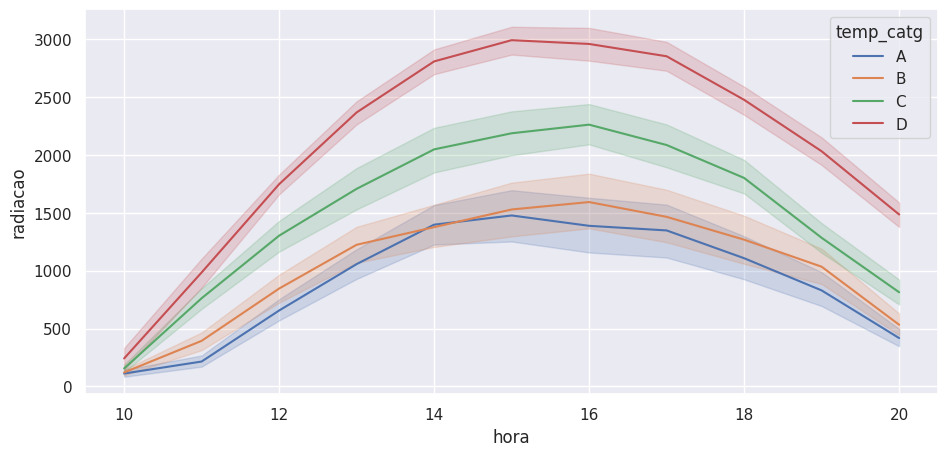

In [17]:
df_temp = filter_between(df, "hora", 10, 20)

df_temp = df_temp[[
    "hora", 
    "radiacao", 
    "temperatura_do_ar_bulbo_seco_horaria_c"]]\
.fillna(0)

df_temp["temp_catg"] = create_category("temperatura_do_ar_bulbo_seco_horaria_c", df_temp)
sns.lineplot(data=df_temp, x=df_temp["hora"], y=df_temp["radiacao"], hue=df_temp["temp_catg"])

#### Hora com a umidade como `hue`

[ 15.  56.  71.  88. 100.]


<Axes: xlabel='hora', ylabel='radiacao'>

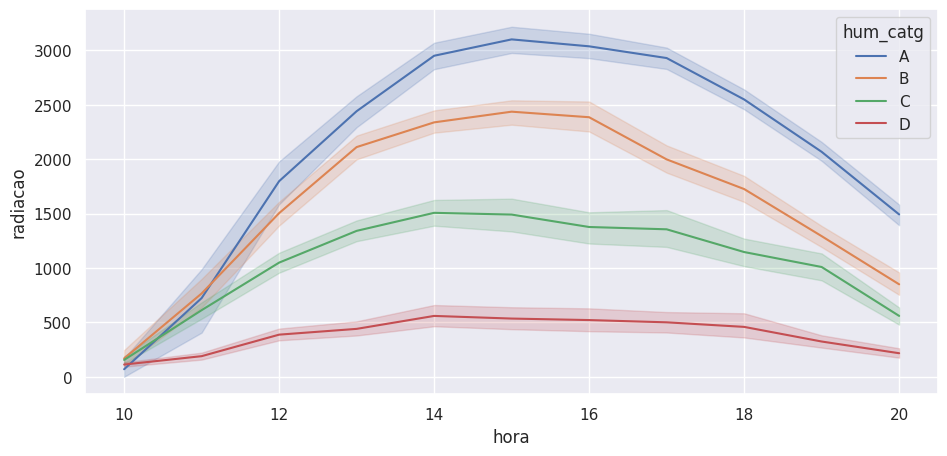

In [18]:
df_hum = filter_between(df, "hora", 10, 20)

df_hum = df_hum[[
    "hora", 
    "radiacao", 
    "umidade_relativa_do_ar_horaria_perc"]]\
.fillna(0)

df_hum["hum_catg"] = create_category("umidade_relativa_do_ar_horaria_perc", df_hum)
sns.lineplot(data=df_hum, x=df_hum["hora"], y=df_hum["radiacao"], hue=df_hum["hum_catg"])

#### Relação linear entre radiação e vento 

<Axes: xlabel='vento_velocidade_horaria_ms', ylabel='radiacao'>

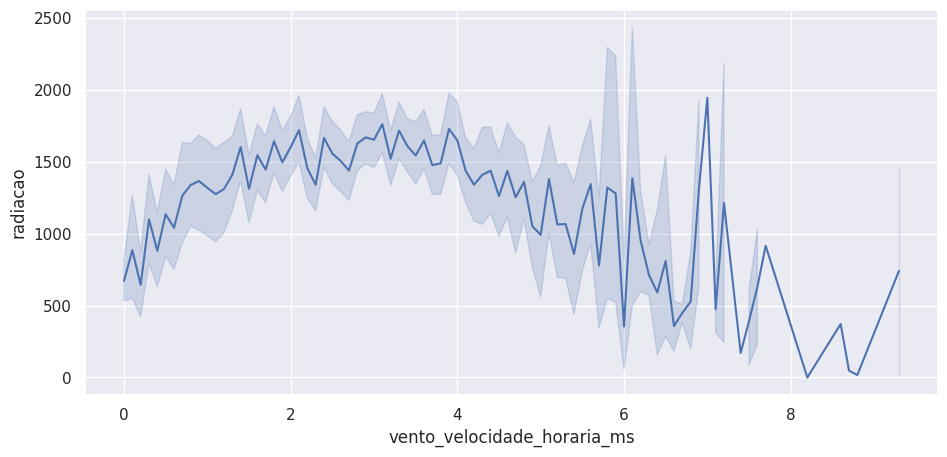

In [19]:
df_rel_wind = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_rel_wind, x=df_rel_wind["vento_velocidade_horaria_ms"], y=df_rel_wind["radiacao"])

#### Relação linear entre radiação e a umidade 

<Axes: xlabel='umidade_relativa_do_ar_horaria_perc', ylabel='radiacao'>

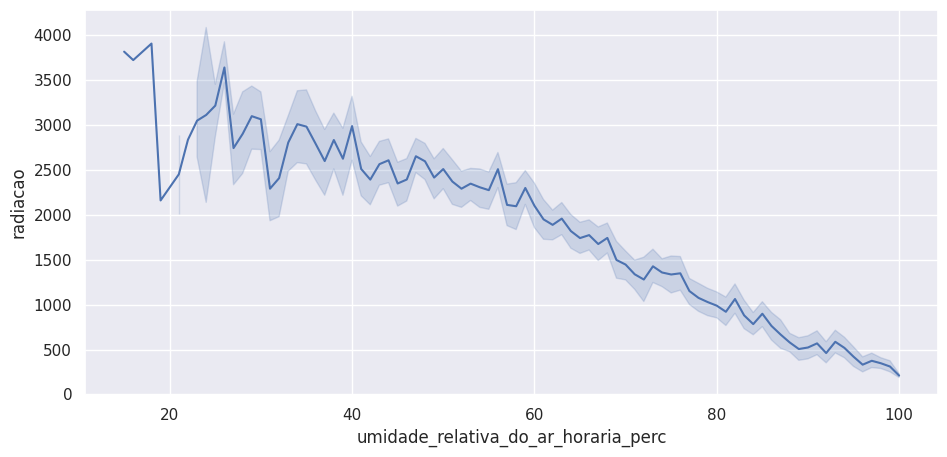

In [20]:
df_rel_hum = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_rel_hum, x=df_rel_hum["umidade_relativa_do_ar_horaria_perc"], y=df_rel_hum["radiacao"])

### Serie temporal ao longo do ano

<Axes: xlabel='data', ylabel='radiacao'>

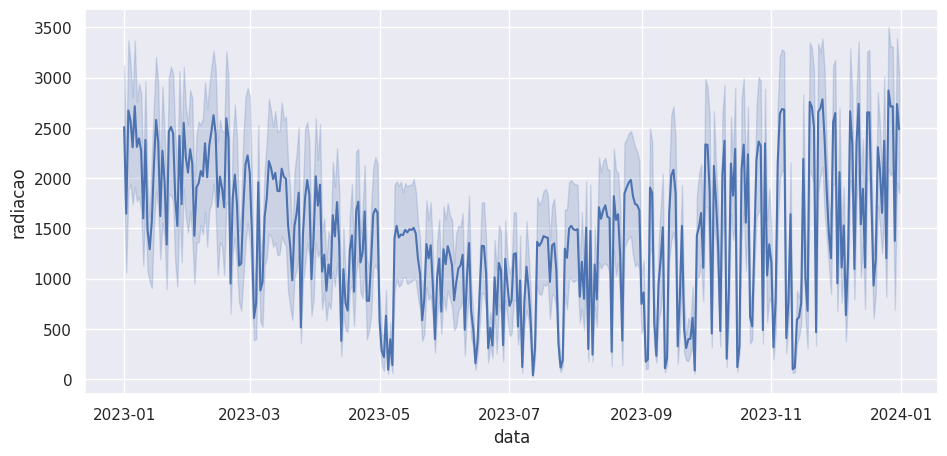

In [21]:
df_test = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_test, x="data", y="radiacao")

### Em uma semana

<Axes: xlabel='data_hora', ylabel='radiacao'>

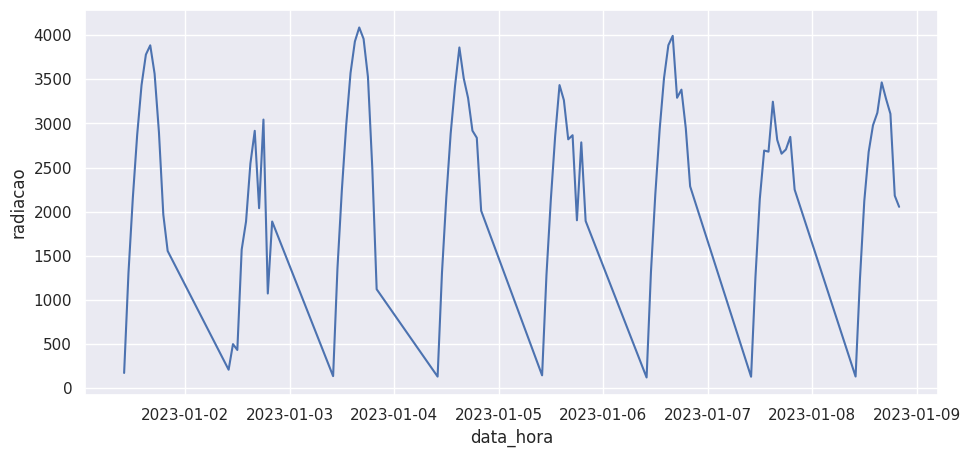

In [22]:
df_test = filter_between(df, "hora", 10, 20)
df_test = filter_between(df_test, "data", "2023-01-01", "2023-01-08")
df_test["rad_mean"] = df_test["radiacao"].mean()
sns.lineplot(data=df_test, x="data_hora", y="radiacao")

### Verão

<Axes: xlabel='data', ylabel='radiacao'>

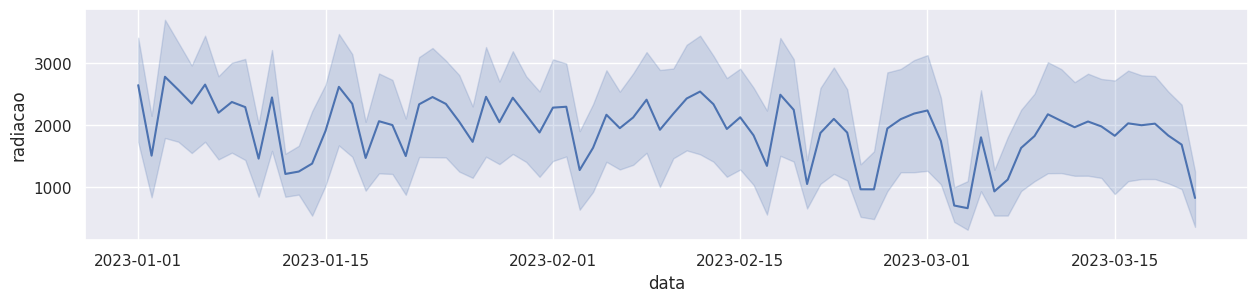

In [23]:
set_plot_size(15, 3)
df_summer = filter_between(df, "data", "2023-01-01", "2023-03-21")
df_summer = filter_between(df_summer, "hora", 10, 17)

sns.lineplot(data=df_summer, x="data", y="radiacao")

### Outono

<Axes: xlabel='data', ylabel='radiacao'>

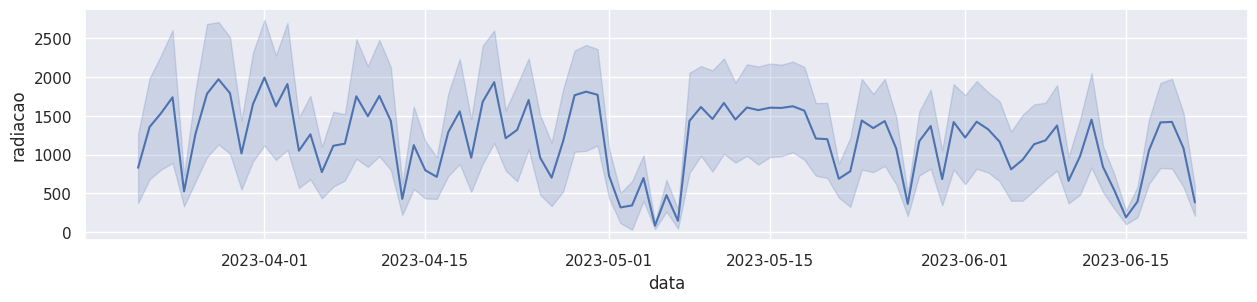

In [24]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-03-21", "2023-06-21")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Inverno

<Axes: xlabel='data', ylabel='radiacao'>

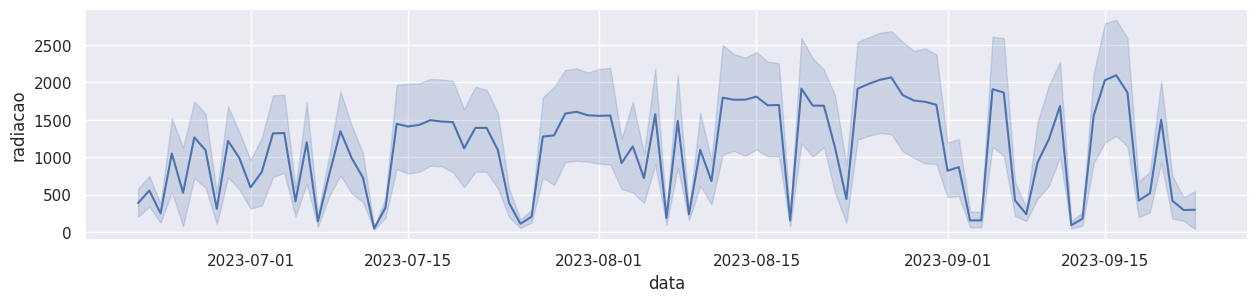

In [25]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-06-21", "2023-09-23")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Primavera

<Axes: xlabel='data', ylabel='radiacao'>

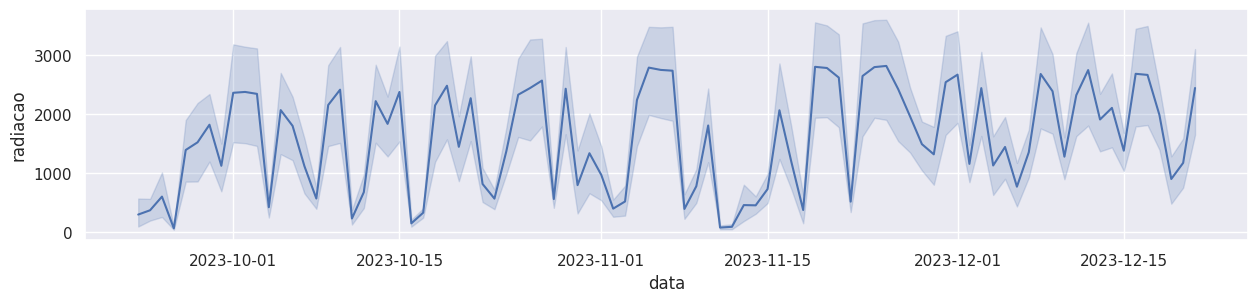

In [26]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-09-23", "2023-12-21")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Media movel

<Axes: xlabel='data', ylabel='media_movel'>

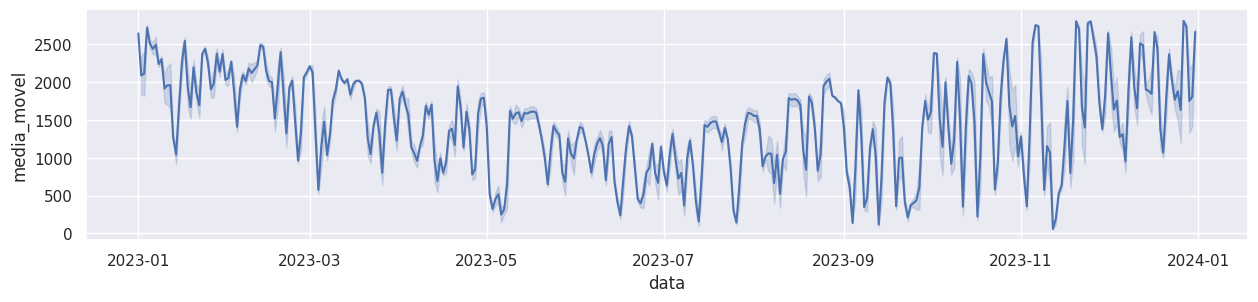

In [27]:
df_test = filter_between(df, "hora", 10, 17)
df_test["media_movel"] = df_test.radiacao.rolling(8).mean()
sns.lineplot(data=df_test, x="data", y="media_movel")

### Aumento e aceleração

<Axes: xlabel='data', ylabel='aumento'>

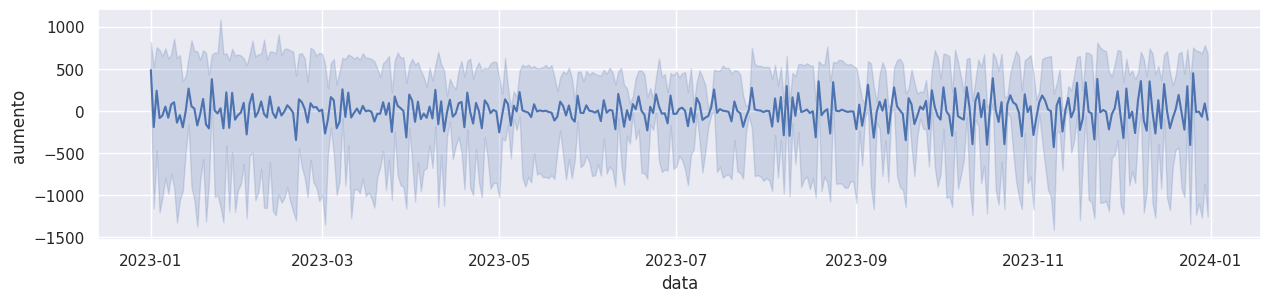

In [28]:
df_test = filter_between(df, "hora", 10, 17)
df_test['aumento'] = df_test.radiacao.diff()
sns.lineplot(data=df_test, x="data", y="aumento")

<Axes: xlabel='data', ylabel='aceleracao'>

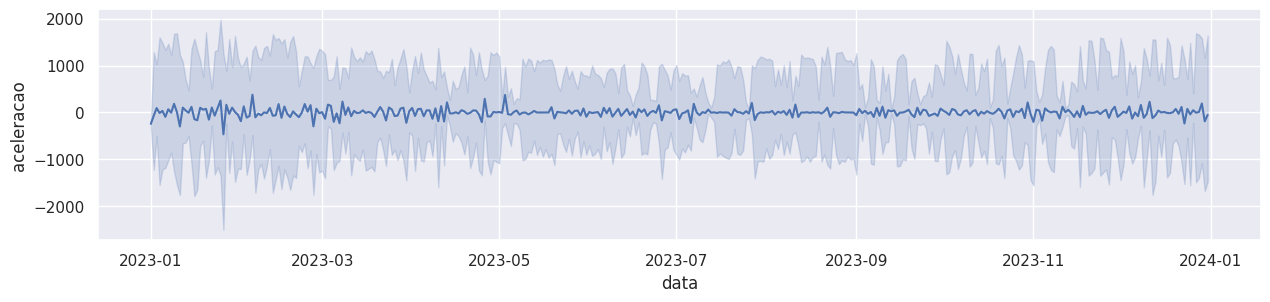

In [29]:
df_test['aceleracao'] = df_test.aumento.diff()
sns.lineplot(data=df_test, x="data", y="aceleracao")

### Autocorrelação

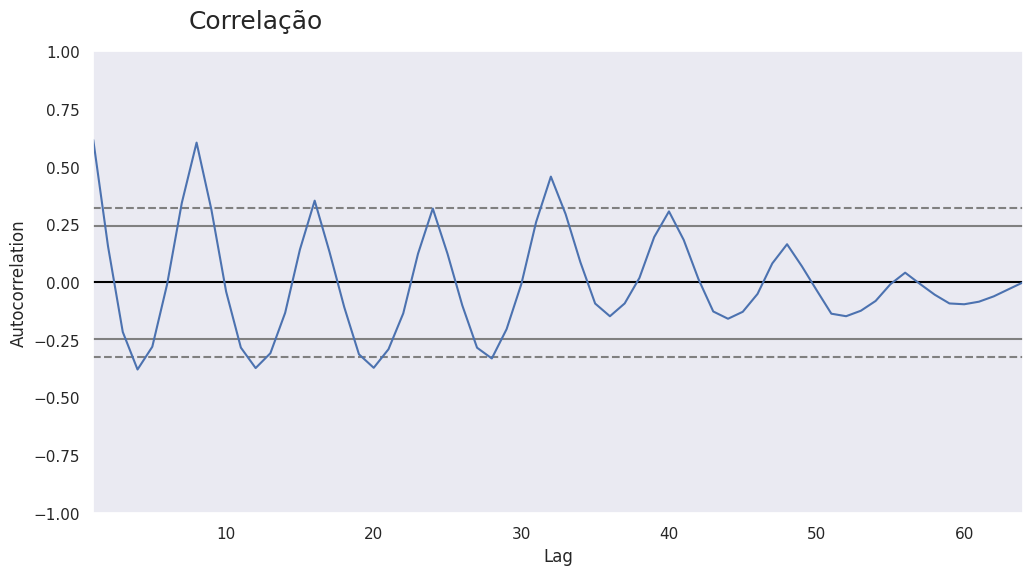

In [30]:
df_test = filter_between(df, "hora", 10, 17)
df_test = filter_between(df_test, "data", "2023-03-21", "2023-03-28")
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_test.radiacao)
ax=ax

### Decomposição

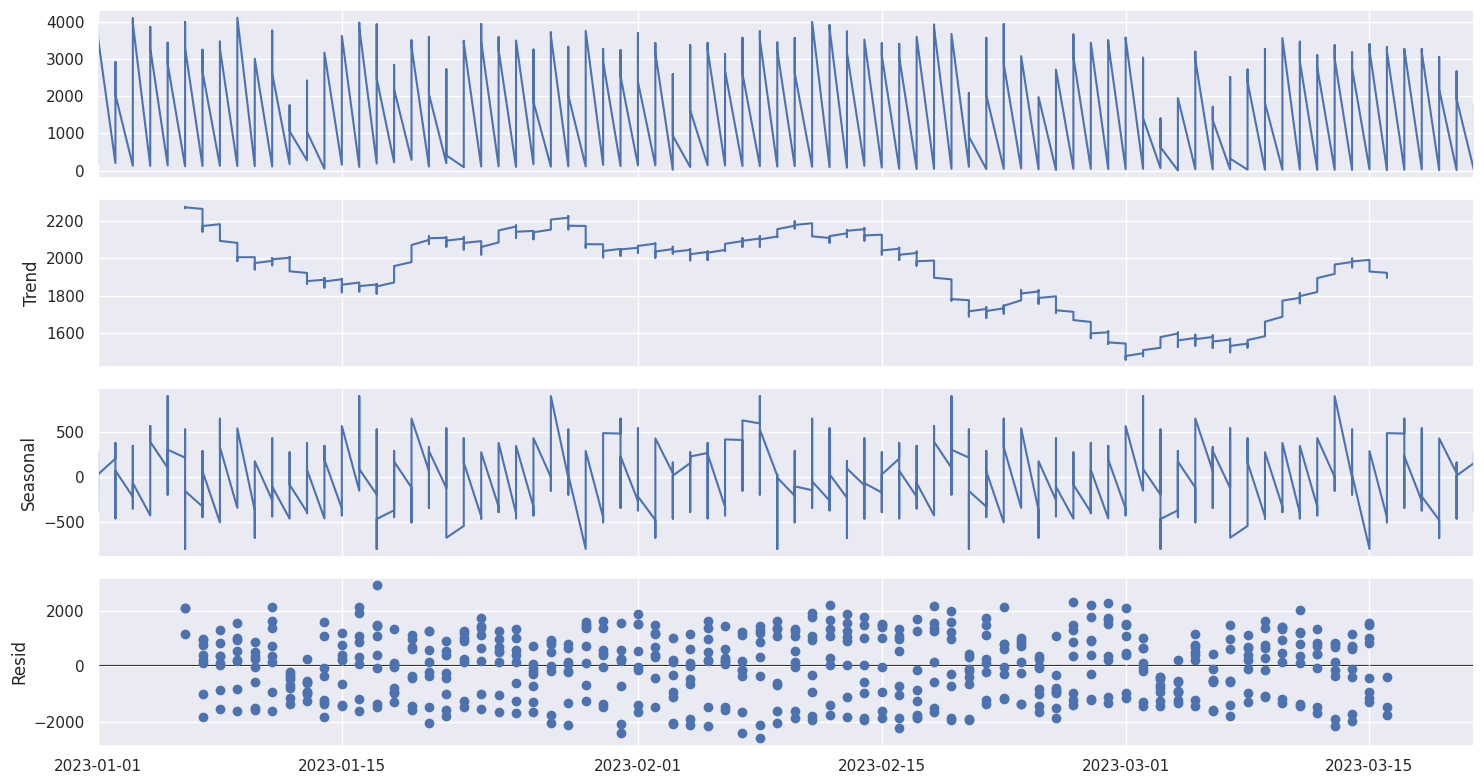

In [31]:
set_plot_size(15, 8)
df_test = filter_between(df, "hora", 10, 17)
df_test = filter_between(df_test, "data", "2023-01-01", "2023-03-21")

resultado = seasonal_decompose(df_test[["radiacao", "data"]].set_index('data'), period=90)
ax = resultado.plot()

### Teste de estacionariedade

In [37]:
result = adfuller(df_test["radiacao"], autolag="AIC")
print('Estatística ADF: {:0.2f}'.format(result[0]))
print('Número de atrasos: {}'.format(result[2]))
print('Valor p: {:0.3f}'.format(result[1]))
for key, value in result[4].items():
    print('Valores críticos:')
    print("{}, {:0.2f}".format(key,value))

Estatística ADF: -4.49
Número de atrasos: 16
Valor p: 0.000
Valores críticos:
1%, -3.44
Valores críticos:
5%, -2.87
Valores críticos:
10%, -2.57


### Box-Cox

In [33]:
# Importar bibliotecas
from scipy.stats import boxcox
# Calcular melhor valor de lambda para a série temporal
df_box_cox = filter_between(df, "data", "2023-01-01", "2023-03-21")
df_box_cox = filter_between(df_box_cox, "hora", 10, 17)
serie_temporal2, lambda_boxcox = boxcox(df_box_cox["radiacao"])

In [34]:
df_box_cox["rad"] = serie_temporal2

<Axes: xlabel='data', ylabel='rad'>

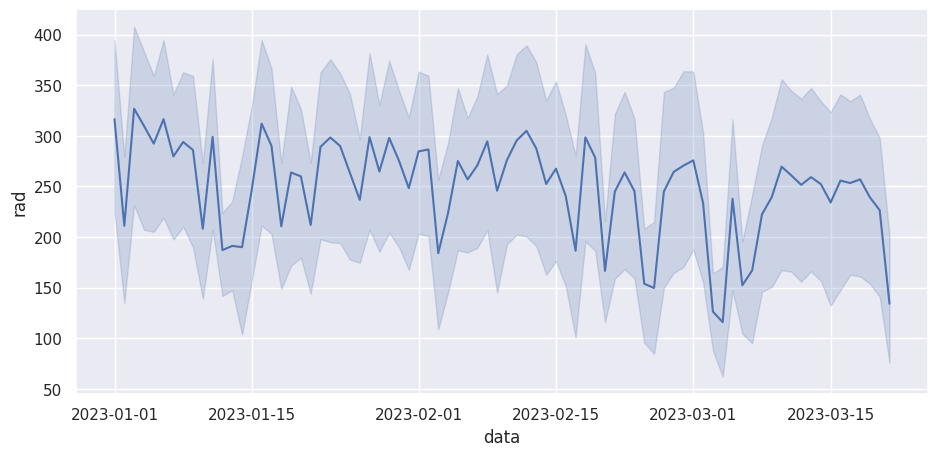

In [35]:
set_plot_size(11, 5)
sns.lineplot(data=df_box_cox, x="data", y="rad")